In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../")
from scripts.eda_Read_data import ReadData
from scripts.cleaning import CleanDataFrame


In [22]:
loader = ReadData()
df = loader.read_csv('../data/clean_train_data.csv')

c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\..\scripts\eda_Read_data.py:44: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


In [3]:
df1 = loader.read_csv('../data/clean_test_data.csv')

c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\..\scripts\eda_Read_data.py:44: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


<AxesSubplot:>

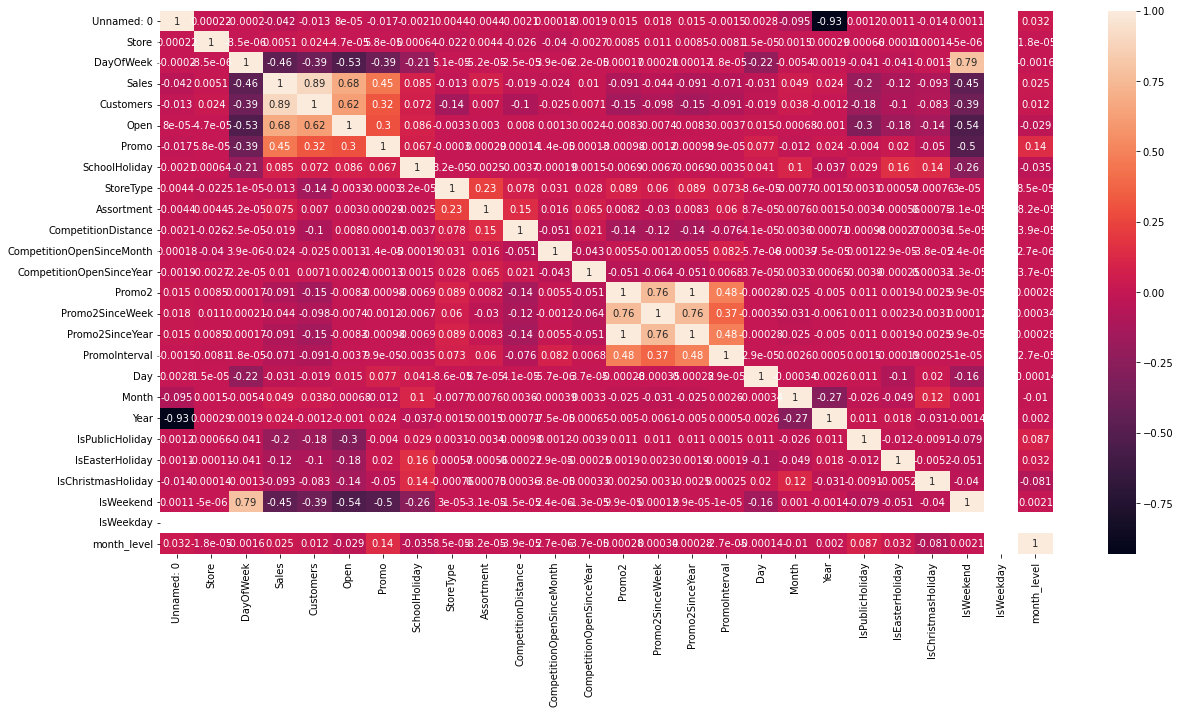

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

The correlation map shows that sales are highly correlated to open, customers and promotions

## Versioning
we will version our data based on:
1. open /closed
2. Customers
3. Promotions

In [11]:
combined_data_subset = df.query("Open == 1")
combined_data_subset.drop(columns='Unnamed: 0', inplace=True)
combined_data_subset.drop(columns='Date', inplace=True)


C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\66983198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_subset.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\66983198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_subset.drop(columns='Date', inplace=True)


In [12]:
combined_data_subset.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
0,1,5,5263,555,1,1,0,1,2,0,...,1,0,7,2015,0,0,0,0,1,0
1,2,5,6064,625,1,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0
2,3,5,8314,821,1,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0
3,4,5,13995,1498,1,1,0,1,2,2,...,1,0,7,2015,0,0,0,0,1,0
4,5,5,4822,559,1,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0


In [14]:
#Saving this data as the first version in dvc
combined_data_subset.to_csv("../data/train_open_stores.csv")


In [35]:
test_data_open=  df1.query("Open == 1")
test_data_open.drop(columns='Unnamed: 0', inplace=True)
test_data_open.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\825010334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_open.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\825010334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_open.drop(columns='Date', inplace=True)


In [36]:
#Saving this data as the second version in dvc
test_data_open.to_csv("../data/test_open_stores.csv")

### Creating a version of the data with stores closed

In [26]:
combined_data_subset_closed = df.query("Open == 0")
combined_data_subset_closed.drop(columns='Unnamed: 0', inplace=True)
combined_data_subset_closed.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\1456185733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_subset_closed.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\1456185733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_subset_closed.drop(columns='Date', inplace=True)


In [27]:
combined_data_subset_closed.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
291,292,5,0,0,0,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0
875,876,5,0,0,0,1,0,1,0,0,...,2,0,7,2015,0,0,0,0,1,0
1406,292,4,0,0,0,1,0,1,0,0,...,1,4,7,2015,0,0,0,0,1,0
1990,876,4,0,0,0,1,0,1,0,0,...,2,4,7,2015,0,0,0,0,1,0
2521,292,3,0,0,0,1,0,1,0,0,...,1,6,7,2015,0,0,0,0,1,0


In [29]:
#Saving this data as the first version in dvc
combined_data_subset_closed.to_csv("../data/train_closed_stores.csv")

In [32]:
test_data_closed=  df1.query("Open == 0")
test_data_closed.drop(columns='Unnamed: 0', inplace=True)
test_data_closed.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\3266253926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_closed.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\3266253926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_closed.drop(columns='Date', inplace=True)


In [33]:
test_data_closed.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
479,480,622,4,0.0,1,0,0,0,2,2425.0,...,1,4,9,2015,0,0,0,0,1,1
543,544,703,4,0.0,1,0,0,0,0,80.0,...,1,4,9,2015,0,0,0,0,1,1
676,677,879,4,0.0,1,0,0,3,0,2425.0,...,2,4,9,2015,0,0,0,0,1,1
840,841,1097,4,0.0,1,0,0,1,1,720.0,...,1,4,9,2015,0,0,0,0,1,1
1335,1336,622,3,0.0,1,0,0,0,2,2425.0,...,1,6,9,2015,0,0,0,0,1,1


In [34]:
#Saving this data as the second version in dvc
test_data_closed.to_csv("../data/test_closed_stores.csv")

### Creating a version of the data with promotions

In [37]:
train_data_promo= df.query("Promo == 1")
train_data_promo.drop(columns='Unnamed: 0', inplace=True)
train_data_promo.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\971431890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_promo.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\971431890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_promo.drop(columns='Date', inplace=True)


In [38]:
test_data_promo= df1.query("Promo == 1")
test_data_promo.drop(columns='Unnamed: 0', inplace=True)
test_data_promo.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\3693061408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_promo.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\3693061408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_promo.drop(columns='Date', inplace=True)


In [39]:
train_data_promo.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
0,1,5,5263,555,1,1,0,1,2,0,...,1,0,7,2015,0,0,0,0,1,0
1,2,5,6064,625,1,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0
2,3,5,8314,821,1,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0
3,4,5,13995,1498,1,1,0,1,2,2,...,1,0,7,2015,0,0,0,0,1,0
4,5,5,4822,559,1,1,0,1,0,0,...,1,0,7,2015,0,0,0,0,1,0


In [42]:
#Saving this data as the third version in dvc
train_data_promo.to_csv("../data/train_with_promo.csv")

In [40]:
test_data_promo.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
0,1,1,4,1.0,1,0,0,2,0,1270.0,...,1,4,9,2015,0,0,0,0,1,1
1,2,3,4,1.0,1,0,0,0,0,14130.0,...,1,4,9,2015,0,0,0,0,1,1
2,3,7,4,1.0,1,0,0,0,2,24000.0,...,1,4,9,2015,0,0,0,0,1,1
3,4,8,4,1.0,1,0,0,0,0,7520.0,...,1,4,9,2015,0,0,0,0,1,1
4,5,9,4,1.0,1,0,0,0,2,2030.0,...,1,4,9,2015,0,0,0,0,1,1


In [41]:
#Saving this data as the third version in dvc
test_data_promo.to_csv("../data/test_with_promo.csv")

### Creating a version of the data with no promo 

In [43]:
train_data_no_promo= df.query("Promo == 0")
train_data_no_promo.drop(columns='Unnamed: 0', inplace=True)
train_data_no_promo.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\1056877448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_no_promo.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\1056877448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_no_promo.drop(columns='Date', inplace=True)


In [44]:
train_data_no_promo.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
5575,1,7,0,0,0,0,0,0,2,0,...,1,3,7,2015,0,0,0,1,1,0
5576,2,7,0,0,0,0,0,0,0,0,...,1,3,7,2015,0,0,0,1,1,0
5577,3,7,0,0,0,0,0,0,0,0,...,1,3,7,2015,0,0,0,1,1,0
5578,4,7,0,0,0,0,0,0,2,2,...,1,3,7,2015,0,0,0,1,1,0
5579,5,7,0,0,0,0,0,0,0,0,...,1,3,7,2015,0,0,0,1,1,0


In [45]:
#Saving this data as the fourth version in dvc
train_data_no_promo.to_csv("../data/train_with_promo.csv")

In [46]:
test_data_no_promo= df1.query("Promo == 0")
test_data_no_promo.drop(columns='Unnamed: 0', inplace=True)
test_data_no_promo.drop(columns='Date', inplace=True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\2078139178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_no_promo.drop(columns='Unnamed: 0', inplace=True)
C:\Users\Stella\AppData\Local\Temp\ipykernel_10180\2078139178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_no_promo.drop(columns='Date', inplace=True)


In [47]:
test_data_no_promo.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
3424,3425,1,7,0.0,0,0,0,2,0,1270.0,...,1,3,9,2015,0,0,0,1,1,1
3425,3426,3,7,0.0,0,0,0,0,0,14130.0,...,1,3,9,2015,0,0,0,1,1,1
3426,3427,7,7,0.0,0,0,0,0,2,24000.0,...,1,3,9,2015,0,0,0,1,1,1
3427,3428,8,7,0.0,0,0,0,0,0,7520.0,...,1,3,9,2015,0,0,0,1,1,1
3428,3429,9,7,0.0,0,0,0,0,2,2030.0,...,1,3,9,2015,0,0,0,1,1,1


In [48]:
#Saving this data as the third version in dvc
test_data_no_promo.to_csv("../data/test_with_promo.csv")